<h1>Boost Converter Control</h1>
<p>This notebook presents two implementation of the voltage control for a boost control.</p>

<h2>System Definition</h2>
<p>Let us consider a boost converter as the one reported in the following figure</p>

<img src="SchemaBoost.png" alt="drawing" width="400"  height="200"/>

<p>The state equations as average model can be written as</p>

<img src="EqBoost.png" alt="drawing" width="240"  height="100"/>

<p>We consider the implementation of a sliding mode control and a synergetic control using the same manifold as in the following:</p>

<img src="Manifold.png" alt="drawing" width="240"  height="100"/>

<h2>System Parameters</h2>

In [1]:
clear all
% Set the Octave Engine to run the simulation
SetSimulationEnvironment;


tini = 0;
tfinal = 0.06;
dt = 0.00001;
nflows = 9;
nnode = 4;
maxn = 20;
toll = 0.0001;

k = 2
Vg = 12
L = 0.00046
C = 0.00136
R = 35
T = 0.0003
fs = 10000
VD = 0.001
Rs = 1e-4
x1ref = 3.8
x2ref = 40

k =  2
Vg =  12
L =  0.00046000
C =  0.0013600
R =  35
T =  0.00030000
fs =  10000
VD =  0.0010000
Rs =  0.00010000
x1ref =  3.8000
x2ref =  40


<h2>Sliding mode</h2>
<p>To implement the sliding mode control we simply need to add an hysterisis control to the evaluation of the manifold</p>

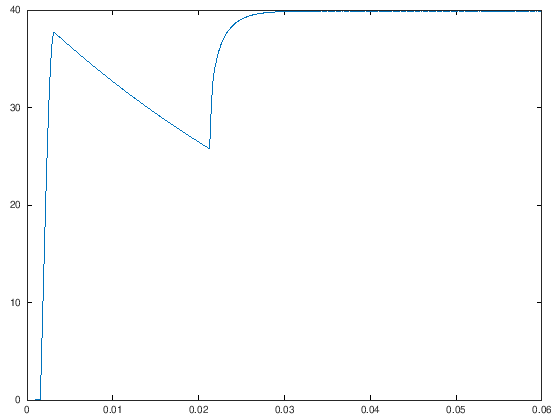

In [2]:

hy = HybridSystem(nnode,nflows,tini,tfinal,dt,maxn,toll);

% Voltage Source
c1{1} = IdealDCVoltageSource(1,0,Vg);
c1{2} = Inductor(1,2,L);
c1{3} = CurrentSensor(2,3,3);
c1{4} = PowerSwitch(3,0,9,0.0001,1e4);
c1{5} = Diode(3,4,1e-4,1e4);
c1{6} = Capacitor(4,0,C);
c1{7} = Resistance(4,0,R);
c1{8} = VoltageSensor(4,0,4);

% Adding all the components to the network diagram
hy.AddListComponents2Network(c1);

b1{1} = StepSource(1,0,x1ref,0.02);
b1{2} = StepSource(2,20,x2ref,0.02);
b1{3} = Sum(1,3,5,1,-1);
b1{4} = Sum(2,4,6,1,-1);
b1{5} = Gain(6,7,k);
b1{6} = Sum(5,7,8,1,1);
b1{7} = Hysterisis(8,9,0.001,1,-1);


% Adding all the components to the Control Schema
hy.AddListComponents2Schema(b1);

hy.Init();
p=1;


while hy.Step()
    time(p) = hy.GetTime();
    out1(p) = hy.GetFlow(3);
    out2(p) = hy.GetFlow(4); 
    p=p+1;
end

plot(time,out2);
    


In [3]:
plot(time,out1);

<h2>Synergetic control</h2>
<p>In this case we need to process the general synergetic equation to calculate the control law</p>
<p>The first step is given by substituing the manifold expression in the main synergetic equations</p>

<img src="SynerEqu.png" alt="drawing" width="350"  height="250"/>

<p>By solving this equation for the duty d we obtain the control law</p>

<img src="DutySyner.png" alt="drawing" width="350"  height="250"/>

In [ ]:
nflows2 = 30;

hy2 = HybridSystem(nnode,nflows2,tini,tfinal,dt,maxn,toll);

% Voltage Source
c2{1} = IdealDCVoltageSource(1,0,Vg);
c2{2} = Inductor(1,2,L);
c2{3} = CurrentSensor(2,3,3);
c2{4} = PowerSwitch(3,0,21,0.0001,1e4);
c2{5} = Diode(3,4,1e-4,1e4);
c2{6} = Capacitor(4,0,C);
c2{7} = Resistance(4,0,R);
c2{8} = VoltageSensor(4,0,4);

% Adding all the components to the network diagram
hy2.AddListComponents2Network(c2);

b2{1} = StepSource(1,0,x1ref,0.02);
b2{2} = StepSource(2,12,x2ref,0.02);
b2{3} = Sum(1,3,5,-1,1);
b2{4} = Sum(2,4,6,-1,1);
b2{5} = Constant(7,1);
b2{6} = Constant(8,k/L*Vg);
b2{7} = Gain(5,12,k/T);
b2{8} = Gain(6,11,1/T);
b2{9} = Gain(4,9,1/(R*C));
b2{10} = Gain(4,15,k/L);
b2{11} = Gain(3,16,1/C);
b2{12} = Sum(12,11,13,1,1);
b2{13} = Sum(9,8,10,-1,1);
b2{14} = Sum(15,16,17,1,-1);
b2{15} = Sum(13,10,14,1,1);
b2{16} = Constant(22,k*VD/L);
b2{17} = Gain(3,23,Rs/L);
b2{18} = Sum(22,23,24,1,-1);
b2{19} = Sum(17,24,25,1,1);
b2{20} = Division(14,25,18);
b2{21} = Sum(7,18,19,1,-1);
b2{22} = Constant(27,0.05);
b2{23} = StepSource(28,1,0,0.02);
b2{24} = Switch(27,28,19,29);
b2{25} = Saturation(29,26,0,0.95);
b2{26} = SawTooth(20,1,0,fs);
b2{27} = GreaterThan(26,20,21,1,-1);

% Adding all the components to the Control Schema
hy2.AddListComponents2Schema(b2);

hy2.Init();
p=1;


while hy2.Step()
    time2(p) = hy2.GetTime();
    out3(p) = hy2.GetFlow(26);
    out4(p) = hy2.GetFlow(4); 
    out5(p) = hy2.GetFlow(3);
    p=p+1;
end

plot(time2,out4);
    



In [ ]:
plot(time2,out3);

In [ ]:
plot(time2,out5);